# House Price Prediction 

## Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
# Importing the required liberies
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

# Surpressing Warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading data
raw_data = pd.read_csv('train.csv')

In [3]:
# Head
raw_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Shape
raw_data.shape

(1460, 81)

In [5]:
# Info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We can clearly see that we have some variables that have missing values.

## EAD

In [6]:
# Copy of the raw data 
eda_data = raw_data.copy(deep=True)

### Missing values

In [7]:
# Function to get missing value info
def get_missing_info(df):
    miss_val = 100*df.isnull().sum()/df.shape[0]
    miss_val = pd.DataFrame(miss_val[miss_val>0].sort_values(ascending=False),columns=['Missing %'])
    miss_val['Dtype'] = df[miss_val.index].dtypes.values
    return miss_val

In [8]:
# Missing Values
missing_values = get_missing_info(eda_data)
missing_values

,Missing %,Dtype
PoolQC,99.520548,object
MiscFeature,96.301370,object
Alley,93.767123,object
Fence,80.753425,object
FireplaceQu,47.260274,object
LotFrontage,17.739726,float64
GarageType,5.547945,object
GarageYrBlt,5.547945,float64
GarageFinish,5.547945,object
GarageQual,5.547945,object


- Here we can see that the variable **`PoolQC`**, **`MiscFeatures`**, **`Alley`**, **`Fence`** and **`FireplaceQC`** have a lot of missing values but these values represent that a particular feature is missing because these features are not present in a particular data point(House), i.e. most of the houses in this data set do not have a pool and therefour, Pool Quality has no rating (null value). We drop these columns as even if we replace these null values with appropriate values (that represent that the particular feature is not present), it would make these values skewed and would affect the model adversely.

In [9]:
# Droping columns
eda_data.drop(missing_values.index[:5],axis=1,inplace=True)

# Geting missing values after droping the columns
missing_values = get_missing_info(eda_data)

# Missing values left to be handeled
missing_values

,Missing %,Dtype
LotFrontage,17.739726,float64
GarageType,5.547945,object
GarageYrBlt,5.547945,float64
GarageFinish,5.547945,object
GarageQual,5.547945,object
GarageCond,5.547945,object
BsmtExposure,2.602740,object
BsmtFinType2,2.602740,object
BsmtQual,2.534247,object
BsmtCond,2.534247,object


- We have to find an appropriate method to replace null values in the variable **`LotFrontage`**.

###### Finding appropriate values to replace null values in the **`LotFrontage`** feature

In simple terms **`LotFrontage`** it is the measurement of the length of a plot of land or a building facing the main road on to which the plot or building fronts, therefour we can replace the null values in this columns with the **Median Lot Frontage in the Neighborhood**.

In [10]:
replace_val = eda_data.groupby(by = 'Neighborhood')['LotFrontage'].median()
replace_val

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    65.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    73.0
NAmes      73.0
NPkVill    24.0
NWAmes     80.0
NoRidge    91.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    61.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64

In [11]:
# Replacing LotFrontage 
eda_data['LotFrontage'] = eda_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [12]:
# Checking missing values again
missing_values = get_missing_info(eda_data)
missing_values

,Missing %,Dtype
GarageType,5.547945,object
GarageYrBlt,5.547945,float64
GarageFinish,5.547945,object
GarageQual,5.547945,object
GarageCond,5.547945,object
BsmtExposure,2.602740,object
BsmtFinType2,2.602740,object
BsmtQual,2.534247,object
BsmtCond,2.534247,object
BsmtFinType1,2.534247,object


In [13]:
# Getting all the columns related yo garage which have missing values
missing_garage_val = missing_values.index[eda_data[missing_values.index].columns.str.contains('^Garage',regex=True)]

In [14]:
# Checking Skewness

for i in missing_values.index:
    print(i)
    print(eda_data[i].value_counts(dropna=False),end='\n\n\n')

GarageType
Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64


GarageYrBlt
NaN       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1906.0     1
1908.0     1
1933.0     1
1900.0     1
1927.0     1
Name: GarageYrBlt, Length: 98, dtype: int64


GarageFinish
Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64


GarageQual
TA     1311
NaN      81
Fa       48
Gd       14
Po        3
Ex        3
Name: GarageQual, dtype: int64


GarageCond
TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64


BsmtExposure
No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64


BsmtFinType2
Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


BsmtQual
TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int6

We can clearly see that replacing values in these columns would make them heavely skewed which would effect the model adversely, therefore we will drop these features.

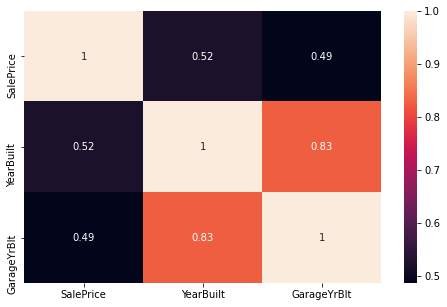

In [15]:
# Heat map
plt.figure(figsize=(8,5))
sns.heatmap(eda_data[['SalePrice','YearBuilt','GarageYrBlt']].corr(),annot=True)
plt.show()

We can also see that the variable `YearBuilt` and `GarageYrBlt` are are highly correlated, we drop `GarageYrBlt` as it has a weeker linear relationship with the Target Variable.

In [16]:
eda_data.drop(missing_values.index,axis=1,inplace=True)

In [17]:
missing_values = get_missing_info(eda_data)

missing_values

,Missing %,Dtype


We can see that there are no missing values left to be handled.

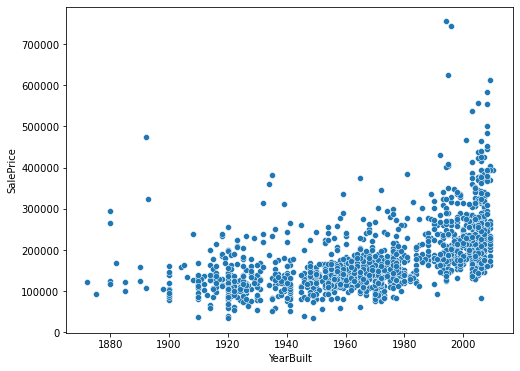

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=eda_data['YearBuilt'],y=eda_data['SalePrice'])
plt.show()

We can see that there is som sort of linear relationship between `YearBuilt` and `SalePrice`, we can derive the age of the house using the `YearBuilt` variable.

In [19]:
eda_data['HouseAge'] = eda_data['YrSold'] - eda_data['YearBuilt']

eda_data['AgeRemodel'] = eda_data['YrSold'] - eda_data['YearRemodAdd']

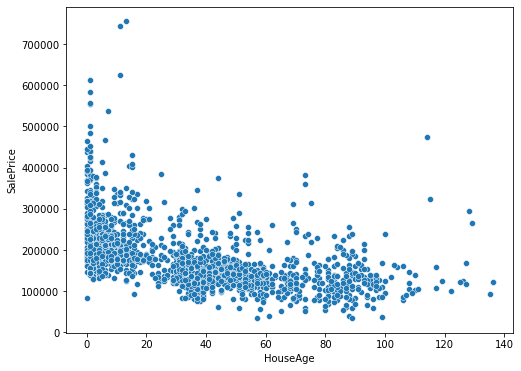

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=eda_data['HouseAge'],y=eda_data['SalePrice'])
plt.show()

Here we can clearly see that as the age of the house increases the price decreases.

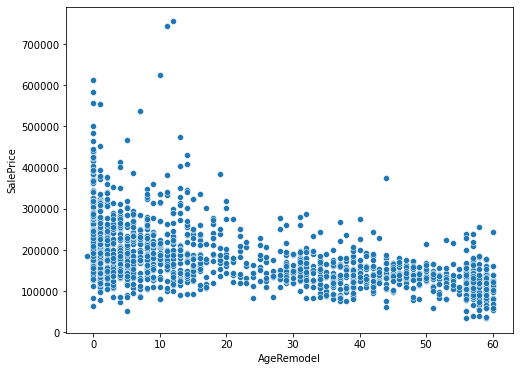

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=eda_data['AgeRemodel'],y=eda_data['SalePrice'])
plt.show()

In [22]:
eda_data.drop(['YearBuilt','YrSold','YearRemodAdd'],axis=1,inplace=True)

In [23]:
eda_data.select_dtypes('number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   BsmtFinSF1     1460 non-null   int64  
 7   BsmtFinSF2     1460 non-null   int64  
 8   BsmtUnfSF      1460 non-null   int64  
 9   TotalBsmtSF    1460 non-null   int64  
 10  1stFlrSF       1460 non-null   int64  
 11  2ndFlrSF       1460 non-null   int64  
 12  LowQualFinSF   1460 non-null   int64  
 13  GrLivArea      1460 non-null   int64  
 14  BsmtFullBath   1460 non-null   int64  
 15  BsmtHalfBath   1460 non-null   int64  
 16  FullBath       1460 non-null   int64  
 17  HalfBath       1460 non-null   int64  
 18  BedroomA

- We do not need the `Id` varable,
- The variable `MSSubClass`, according to the data discription given by the client, is actually a categorical variable.

In [24]:
eda_data.drop('Id',axis=1,inplace=True)

In [25]:
eda_data['MSSubClass'] = eda_data['MSSubClass'].astype('object')

In [26]:
eda_data.shape

(1460, 61)

#### Categorical to Numeric variable transformation

In [27]:
categorical_variable = eda_data.select_dtypes('object')

In [28]:
categorical_variable.shape

(1460, 28)

In [29]:
categorical_variable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  ExterQual      1460 non-null   object
 18  ExterCond      1460 non-null

###### Ordinal Categorical Variables

In [30]:
ordinal_valiables = categorical_variable.columns[categorical_variable.columns.str.contains('Qual$|Cond$|QC$',regex=True)]
ordinal_valiables

Index(['ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual'], dtype='object')

In [31]:
ordinal_transformer = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1, 'NA':0}
eda_data[ordinal_valiables] = eda_data[ordinal_valiables].apply(lambda x: x.map(ordinal_transformer))

In [32]:
eda_data[ordinal_valiables].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ExterQual    1460 non-null   int64
 1   ExterCond    1460 non-null   int64
 2   HeatingQC    1460 non-null   int64
 3   KitchenQual  1460 non-null   int64
dtypes: int64(4)
memory usage: 45.8 KB


In [33]:
ordinal_valiables = list(ordinal_valiables)
ordinal_valiables.append('SalePrice')

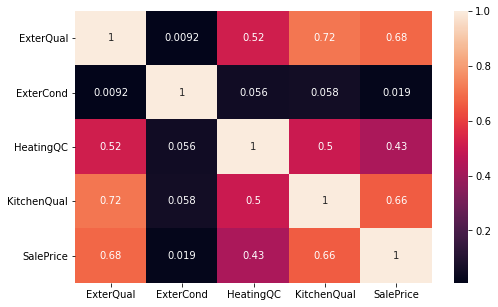

In [34]:
plt.figure(figsize=(8,5))
sns.heatmap(eda_data[ordinal_valiables].corr(),annot=True)
plt.show()

We can see that the `ExterCond` variable has no linear relationship to the target variable and therefore it is best to drop it.

In [35]:
eda_data.drop('ExterCond',axis=1,inplace=True)

###### Nominal Categorical Variables

In [36]:
nominal_variables = eda_data.select_dtypes('object')

In [37]:
nominal_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  Foundation     1460 non-null   object
 18  Heating        1460 non-null

In [38]:
# Checking Skewness

for i in nominal_variables.columns:
    print(i)
    print(round(100*eda_data[i].value_counts(dropna=False,normalize=True),2),end='\n\n\n')

MSSubClass
20     36.71
60     20.48
50      9.86
120     5.96
30      4.73
160     4.32
70      4.11
80      3.97
90      3.56
190     2.05
85      1.37
75      1.10
45      0.82
180     0.68
40      0.27
Name: MSSubClass, dtype: float64


MSZoning
RL         78.84
RM         14.93
FV          4.45
RH          1.10
C (all)     0.68
Name: MSZoning, dtype: float64


Street
Pave    99.59
Grvl     0.41
Name: Street, dtype: float64


LotShape
Reg    63.36
IR1    33.15
IR2     2.81
IR3     0.68
Name: LotShape, dtype: float64


LandContour
Lvl    89.79
Bnk     4.32
HLS     3.42
Low     2.47
Name: LandContour, dtype: float64


Utilities
AllPub    99.93
NoSeWa     0.07
Name: Utilities, dtype: float64


LotConfig
Inside     72.05
Corner     18.01
CulDSac     6.44
FR2         3.22
FR3         0.27
Name: LotConfig, dtype: float64


LandSlope
Gtl    94.66
Mod     4.45
Sev     0.89
Name: LandSlope, dtype: float64


Neighborhood
NAmes      15.41
CollgCr    10.27
OldTown     7.74
Edwards     6.85
Som

There are many columns that are skewed and therefour have to be removed so that they do not have a negative effect on the model. Which are,
   - MSZoning
   - Street
   - LandContur
   - Utilities
   - LotConfig
   - LandSlope
   - Condition1
   - Condition2
   - Exterior2nd
   - BldgType
   - RoofStyle
   - RoofMatl
   - Heating
   - CentralAir
   - Functional
   - PavedDrive
   - SaleType
   - SaleCondition

In [39]:
drop_coll = ['MSZoning','Street','LandContour','Utilities','LotConfig','LandSlope','Condition1','Condition2','BldgType'
             ,'Exterior2nd','RoofStyle','RoofMatl','Heating','CentralAir','Functional','PavedDrive','SaleType','SaleCondition']

nominal_variables.drop(drop_coll,axis=1,inplace=True)

eda_data.drop(drop_coll,axis=1,inplace=True)

In [40]:
nominal_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   object
 1   LotShape      1460 non-null   object
 2   Neighborhood  1460 non-null   object
 3   HouseStyle    1460 non-null   object
 4   Exterior1st   1460 non-null   object
 5   Foundation    1460 non-null   object
dtypes: object(6)
memory usage: 68.6+ KB


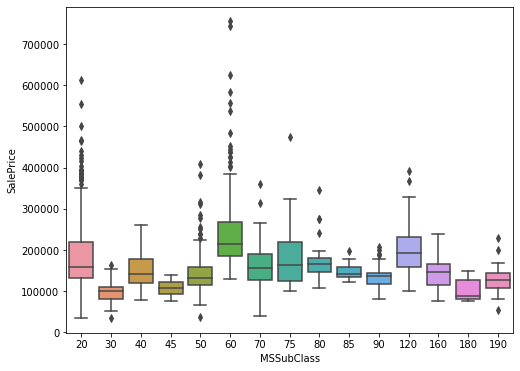

In [41]:
plt.figure(figsize=(8,6))
sns.boxplot(x=eda_data['MSSubClass'],y=eda_data['SalePrice'])
plt.show()

In [42]:
nominal_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1460 non-null   object
 1   LotShape      1460 non-null   object
 2   Neighborhood  1460 non-null   object
 3   HouseStyle    1460 non-null   object
 4   Exterior1st   1460 non-null   object
 5   Foundation    1460 non-null   object
dtypes: object(6)
memory usage: 68.6+ KB


In [43]:
nominal_variables['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

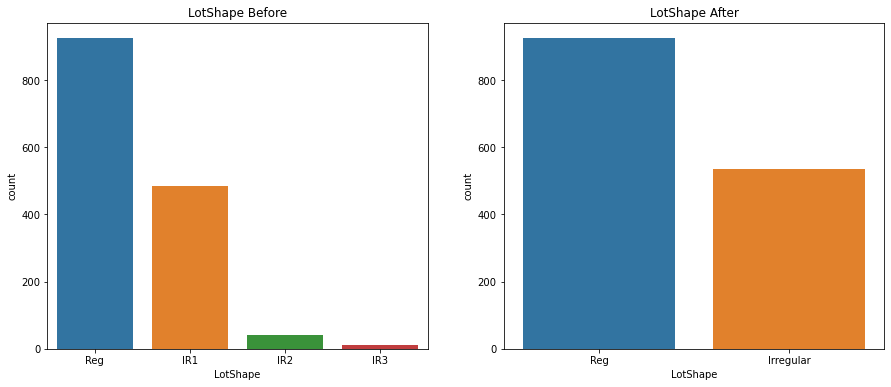

In [44]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

ax1.set_title('LotShape Before')
sns.countplot(eda_data['LotShape'],ax=ax1)

eda_data['LotShape'] = eda_data['LotShape'].replace(['IR1','IR2','IR3'],'Irregular')
nominal_variables.drop('LotShape',axis=1,inplace=True)

ax2.set_title('LotShape After')
sns.countplot(eda_data['LotShape'],ax=ax2)

plt.show()

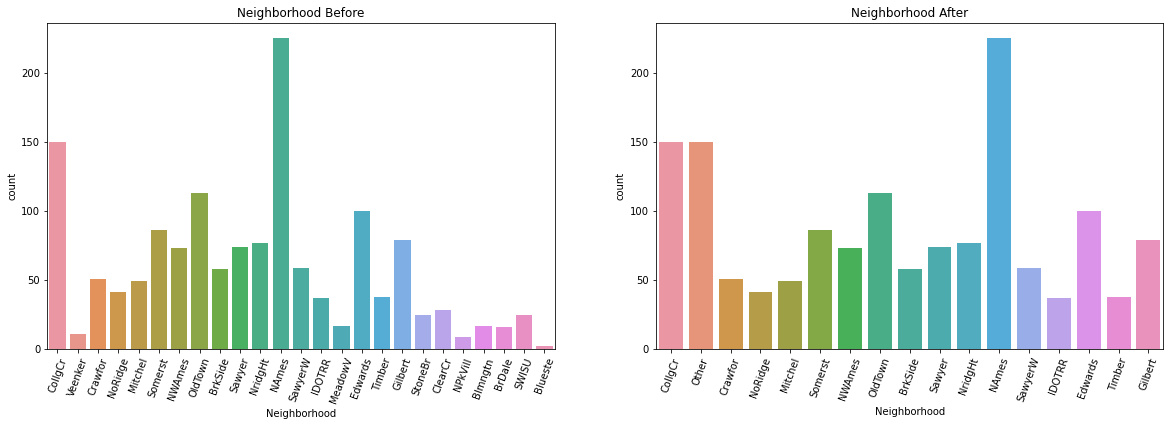

In [45]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))

ax1.set_title('Neighborhood Before')
sns.countplot(eda_data['Neighborhood'],ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),Rotation=70)

eda_data['Neighborhood'] = eda_data['Neighborhood'].replace(['NPkVill','Blueste','Veenker','BrDale','Blmngtn','MeadowV'
                                                             ,'StoneBr','SWISU','ClearCr'],'Other')
nominal_variables.drop('Neighborhood',axis=1,inplace=True)

ax2.set_title('Neighborhood After')
sns.countplot(eda_data['Neighborhood'],ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(),Rotation=70)

plt.show()

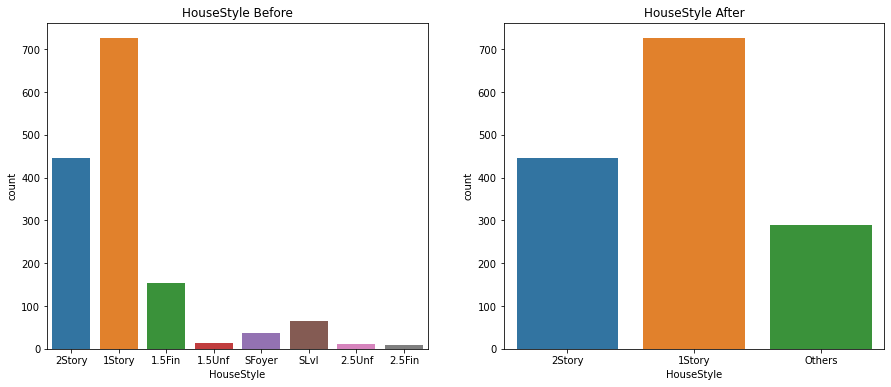

In [46]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

ax1.set_title('HouseStyle Before')
sns.countplot(eda_data['HouseStyle'],ax=ax1)

eda_data['HouseStyle'] = eda_data['HouseStyle'].replace(['1.5Fin','SLvl','SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
nominal_variables.drop('HouseStyle',axis=1,inplace=True)

ax2.set_title('HouseStyle After')
sns.countplot(eda_data['HouseStyle'],ax=ax2)

plt.show()

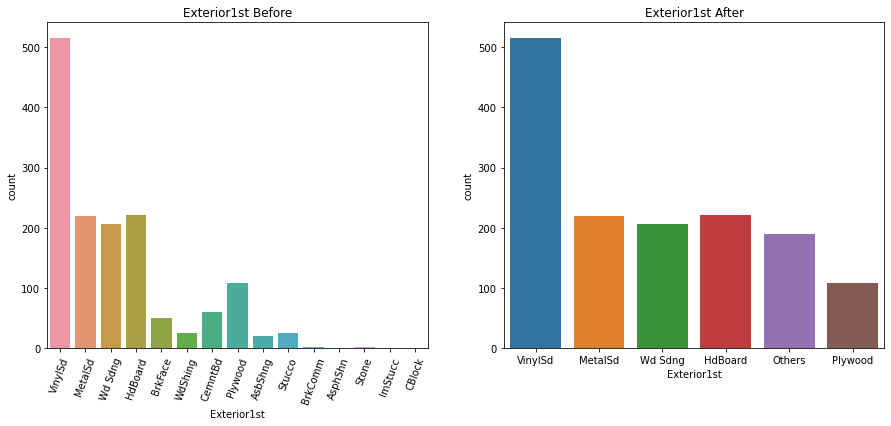

In [47]:
# Exterior1st

combine = eda_data['Exterior1st'].value_counts()
combine = combine[combine<100].keys()

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

ax1.set_title('Exterior1st Before')
sns.countplot(eda_data['Exterior1st'],ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),Rotation=70)

eda_data['Exterior1st'] = eda_data['Exterior1st'].replace(combine,'Others')
nominal_variables.drop('Exterior1st',axis=1,inplace=True)

ax2.set_title('Exterior1st After')
sns.countplot(eda_data['Exterior1st'],ax=ax2)

plt.show()

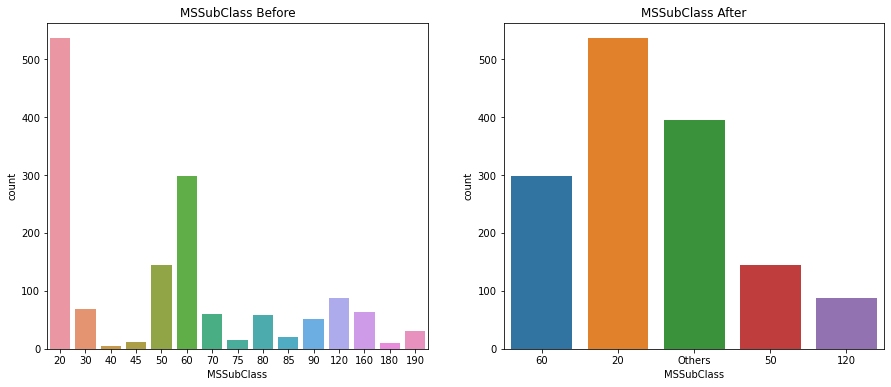

In [48]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

ax1.set_title('MSSubClass Before')
sns.countplot(eda_data['MSSubClass'],ax=ax1)

eda_data['MSSubClass'] = eda_data['MSSubClass'].replace([40,45,75,180,85,190,90,80,70,160,30],'Others')
eda_data['MSSubClass'] = eda_data['MSSubClass'].astype('object')
nominal_variables.drop('MSSubClass',axis=1,inplace=True)

ax2.set_title('MSSubClass After')
sns.countplot(eda_data['MSSubClass'],ax=ax2)

plt.show()

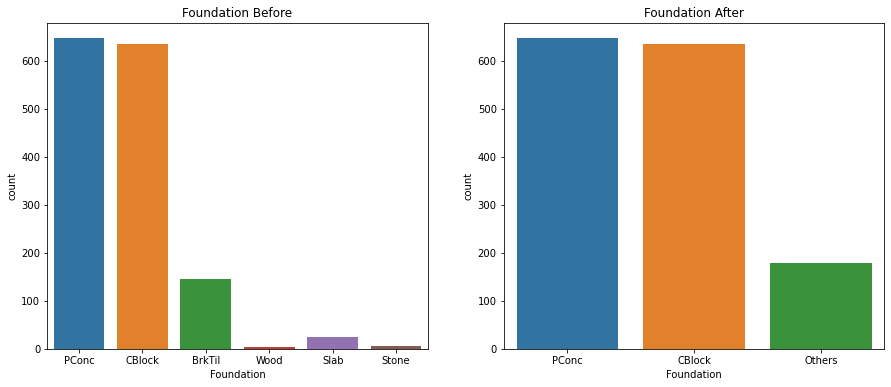

In [49]:
# Foundation

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

ax1.set_title('Foundation Before')
sns.countplot(eda_data['Foundation'],ax=ax1)

eda_data['Foundation'] = eda_data['Foundation'].replace(['BrkTil','Slab','Stone','Wood'],'Others')
nominal_variables.drop('Foundation',axis=1,inplace=True)

ax2.set_title('Foundation After')
sns.countplot(eda_data['Foundation'],ax=ax2)

plt.show()

In [50]:
nominal_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Empty DataFrame

# Outliers

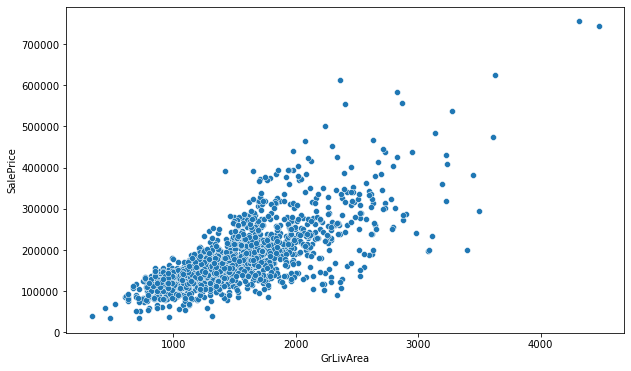

In [123]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=eda_data['GrLivArea'],y=eda_data['SalePrice'])
plt.show()

Here we consider the points on the bottom right of he plot to be outliers as they may have effect on the line of best fit.

In [52]:
temp = eda_data[(eda_data['SalePrice']<300000)&(eda_data['GrLivArea']>4000)]

temp

,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,Exterior1st,ExterQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge,AgeRemodel
523,60,130.0,40094,Irregular,Edwards,2Story,10,5,Others,5,...,406,0,0,0,0,0,10,184750,0,-1
1298,60,313.0,63887,Irregular,Edwards,2Story,10,5,Others,5,...,292,0,0,0,480,0,1,160000,0,0


In [53]:
eda_data.drop(temp.index,inplace=True)

In [54]:
eda_data.shape

(1458, 42)

### Creating Dummies

In [55]:
eda_data.shape

(1458, 42)

In [56]:
dummy_variables = eda_data.select_dtypes('object')

dummy_variables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1458 non-null   object
 1   LotShape      1458 non-null   object
 2   Neighborhood  1458 non-null   object
 3   HouseStyle    1458 non-null   object
 4   Exterior1st   1458 non-null   object
 5   Foundation    1458 non-null   object
dtypes: object(6)
memory usage: 79.7+ KB


In [57]:
eda_data.drop(dummy_variables.columns,axis=1,inplace=True)

dummy_variables = pd.get_dummies(dummy_variables,drop_first=True)

modeling_data = pd.concat([eda_data,dummy_variables],axis=1)

eda_data.shape,dummy_variables.shape,modeling_data.shape

((1458, 36), (1458, 30), (1458, 66))

In [58]:
# Function to get the top correlations
def top_corr(data,num = 10,target_coll = ' '):
    req_col=data._get_numeric_data().columns.tolist()
    if target_coll in req_col:
        req_col.remove(target_coll)
    var_list=[]
    from itertools import combinations
    for i in combinations(data.columns,2):
        i=list(i)
        var_list.append(i)
    corr_df=pd.DataFrame(var_list,columns=['Var1','Var2'])
    corr_df['Correlations']=corr_df[['Var1','Var2']].apply(lambda x: data[list(x)].corr().iloc[1,0],axis=1)
    corr_df['Corr_abs']=corr_df['Correlations'].abs()
    # Returning a Dataframe whose values are sorted according to the absolute correlation values
    return corr_df.sort_values(by='Corr_abs',ascending=False).head(num)


In [59]:
top_corr(modeling_data)

,Var1,Var2,Correlations,Corr_abs
1242,GarageCars,GarageArea,0.887304,0.887304
774,GrLivArea,TotRmsAbvGrd,0.829498,0.829498
705,2ndFlrSF,HouseStyle_2Story,0.808753,0.808753
493,TotalBsmtSF,1stFlrSF,0.803830,0.803830
159,OverallQual,SalePrice,0.795774,0.795774
1758,MSSubClass_60,HouseStyle_2Story,0.761882,0.761882
786,GrLivArea,SalePrice,0.734968,0.734968
130,OverallQual,ExterQual,0.723286,0.723286
269,ExterQual,KitchenQual,0.713812,0.713812
661,2ndFlrSF,GrLivArea,0.694678,0.694678


In [60]:
modeling_data.shape

(1458, 66)

### X and Y data

In [61]:
x = modeling_data.drop('SalePrice',axis=1)

In [62]:
y = modeling_data.pop('SalePrice')

### Scaling 

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x[x.columns] = scaler.fit_transform(x)

### Checking If the Target variable is normally distibuted

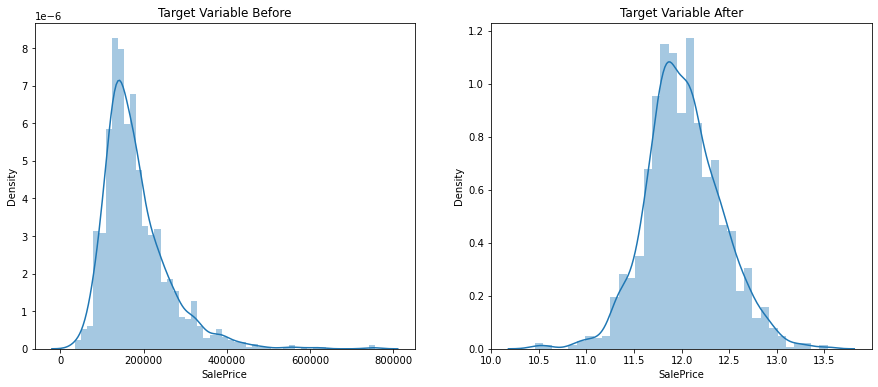

In [64]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,6))

ax1.set_title('Target Variable Before')
sns.distplot(y,ax=ax1)

y = np.log(y)

ax2.set_title('Target Variable After')
sns.distplot(y,ax=ax2)

plt.show()

### Train Test Split

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=42)

# Model Building

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

#### Base Model - Linear Regression

In [68]:
lin_rig = LinearRegression()

In [69]:
Base_Model = lin_rig.fit(x_train,y_train)

In [70]:
Base_Model_Pred = Base_Model.predict(x_train)

results = pd.DataFrame(columns=('R2_Train','RMSE_Train','R2_Test','RMSE_Test'))

temp_results = []

temp_results.append(r2_score(y_train,Base_Model_Pred))

temp_results.append(round(mean_squared_error(np.exp(y_train),np.exp(Base_Model_Pred))**0.5,0))

Base_Model_Pred_Test = Base_Model.predict(x_test)

temp_results.append(r2_score(y_test,Base_Model_Pred_Test))

temp_results.append(round(mean_squared_error(np.exp(y_test),np.exp(Base_Model_Pred_Test))**0.5,0))

In [71]:
results.loc['Base LR Model'] = temp_results

results

,R2_Train,RMSE_Train,R2_Test,RMSE_Test
Base LR Model,0.919872,21267.0,0.900467,20681.0


#### Ridge Regression

In [72]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [73]:
rig_reg = Ridge(random_state=42)

In [74]:
Base_Ridge = rig_reg.fit(x_train,y_train)

In [75]:
Base_Model_Pred_Ridge = Base_Ridge.predict(x_train)

temp_results = []

temp_results.append(r2_score(y_train,Base_Model_Pred_Ridge))

temp_results.append(round(mean_squared_error(np.exp(y_train),np.exp(Base_Model_Pred_Ridge))**0.5,0))

Base_Model_Pred_Test_Ridge = Base_Model.predict(x_test)

temp_results.append(r2_score(y_test,Base_Model_Pred_Test_Ridge))

temp_results.append(round(mean_squared_error(np.exp(y_test),np.exp(Base_Model_Pred_Test_Ridge))**0.5,0))

In [76]:
results.loc['Base Ridge Model'] = temp_results

results

,R2_Train,RMSE_Train,R2_Test,RMSE_Test
Base LR Model,0.919872,21267.0,0.900467,20681.0
Base Ridge Model,0.919872,21267.0,0.900467,20681.0


#### Best Ridge Model 

In [77]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = rig_reg, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [78]:
model_cv.best_estimator_

Ridge(alpha=50, random_state=42)

In [79]:
model_cv.best_score_

-0.01508402012097751

In [80]:
rig_reg = Ridge(alpha=50, random_state=42)

Best_Ridge = rig_reg.fit(x_train,y_train)

In [81]:
Best_Ridge_Pred = Best_Ridge.predict(x_train)

temp_results = []

temp_results.append(r2_score(y_train,Best_Ridge_Pred))

temp_results.append(round(mean_squared_error(np.exp(y_train),np.exp(Best_Ridge_Pred))**0.5,0))

Best_Ridge_Pred_Test = Best_Ridge.predict(x_test)

temp_results.append(r2_score(y_test,Best_Ridge_Pred_Test))

temp_results.append(round(mean_squared_error(np.exp(y_test),np.exp(Best_Ridge_Pred_Test))**0.5))

In [82]:
results.loc['Best Ridge Model'] = temp_results

results

,R2_Train,RMSE_Train,R2_Test,RMSE_Test
Base LR Model,0.919872,21267.0,0.900467,20681.0
Base Ridge Model,0.919872,21267.0,0.900467,20681.0
Best Ridge Model,0.919078,21471.0,0.901191,20490.0


### Base Laso Model

In [83]:
from sklearn.linear_model import Lasso

In [84]:
laso_reg = Lasso(random_state=42)

In [85]:
Base_Laso = laso_reg.fit(x_train,y_train)

In [86]:
Base_Model_Pred_Laso = Base_Laso.predict(x_train)

temp_results = []

temp_results.append(r2_score(y_train,Base_Model_Pred_Laso))

temp_results.append(round(mean_squared_error(np.exp(y_train),np.exp(Base_Model_Pred_Laso))**0.5,0))

Base_Model_Pred_Test_Laso = Base_Laso.predict(x_test)

temp_results.append(r2_score(y_test,Base_Model_Pred_Test_Laso))

temp_results.append(round(mean_squared_error(np.exp(y_test),np.exp(Base_Model_Pred_Test_Laso))**0.5,0))

In [87]:
results.loc['Base Laso Model'] = temp_results

results

,R2_Train,RMSE_Train,R2_Test,RMSE_Test
Base LR Model,0.919872,21267.0,0.900467,20681.0
Base Ridge Model,0.919872,21267.0,0.900467,20681.0
Best Ridge Model,0.919078,21471.0,0.901191,20490.0
Base Laso Model,0.000000,82080.0,-0.001085,77106.0


In [88]:
laso_reg.coef_

array([ 0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0.,
        0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0.,  0.,  0.,  0., -0.,  0., -0., -0., -0.,  0.,  0., -0.,
       -0.,  0.,  0., -0.,  0., -0., -0., -0.,  0.,  0.,  0., -0.,  0.,
       -0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0., -0., -0.,  0.])

#### Best Laso Model 

In [89]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#ridge = Ridge()

# cross validation
folds = 5
best_laso_model_cv = GridSearchCV(estimator = laso_reg, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

best_laso_model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [90]:
best_laso_model_cv.best_estimator_

Lasso(alpha=0.001, random_state=42)

In [91]:
best_laso_model_cv.best_score_

-0.015184001335190225

In [92]:
laso_reg = Lasso(alpha=0.001, random_state=42)

Best_Laso = laso_reg.fit(x_train,y_train)

In [93]:
Best_Laso_Pred = Best_Laso.predict(x_train)

temp_results = []

temp_results.append(r2_score(y_train,Best_Laso_Pred))

temp_results.append(round(mean_squared_error(np.exp(y_train),np.exp(Best_Ridge_Pred))**0.5,0))

Best_Laso_Pred_Test = Best_Laso.predict(x_test)

temp_results.append(r2_score(y_test,Best_Laso_Pred_Test))

temp_results.append(round(mean_squared_error(np.exp(y_test),np.exp(Best_Laso_Pred_Test))**0.5,0))

In [94]:
results.loc['Best Laso Model'] = temp_results

results

,R2_Train,RMSE_Train,R2_Test,RMSE_Test
Base LR Model,0.919872,21267.0,0.900467,20681.0
Base Ridge Model,0.919872,21267.0,0.900467,20681.0
Best Ridge Model,0.919078,21471.0,0.901191,20490.0
Base Laso Model,0.000000,82080.0,-0.001085,77106.0
Best Laso Model,0.919034,21471.0,0.902861,20423.0


In [95]:
betas = pd.DataFrame(index=x.columns)

In [96]:
betas.rows = x.columns

In [97]:
betas['Linear'] = lin_rig.coef_
betas['Ridge'] = rig_reg.coef_
betas['Lasso'] = laso_reg.coef_

In [98]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
LotFrontage,1.697186e-02,0.016746,0.015703
LotArea,1.976453e-02,0.018420,0.018577
OverallQual,7.581189e-02,0.071980,0.078433
OverallCond,5.176465e-02,0.045808,0.050300
ExterQual,6.294318e-03,0.010456,0.006877
BsmtFinSF1,-3.981298e+10,0.034956,0.035705
BsmtFinSF2,-1.484319e+10,0.004680,0.004014
BsmtUnfSF,-4.065142e+10,0.000064,-0.000000
TotalBsmtSF,3.815904e+10,0.038360,0.039000
HeatingQC,1.039290e-02,0.011528,0.010022


In [99]:
best_Linear = abs(betas[['Linear']]).sort_values(by='Linear', ascending=False).head().index

betas.loc[best_Linear,'Linear']

GrLivArea     1.602251e+11
2ndFlrSF     -1.373672e+11
1stFlrSF     -1.173707e+11
BsmtUnfSF    -4.065142e+10
BsmtFinSF1   -3.981298e+10
Name: Linear, dtype: float64

In [100]:
best_ridge = abs(betas[['Ridge']]).sort_values(by='Ridge', ascending=False).head().index

betas.loc[best_ridge,'Ridge']

OverallQual    0.071980
GrLivArea      0.055382
HouseAge      -0.047939
OverallCond    0.045808
1stFlrSF       0.038378
Name: Ridge, dtype: float64

In [101]:
best_lasso = abs(betas[['Lasso']]).sort_values(by='Lasso', ascending=False).head().index

betas.loc[best_lasso,'Lasso']

GrLivArea      0.104687
OverallQual    0.078433
HouseAge      -0.059791
OverallCond    0.050300
TotalBsmtSF    0.039000
Name: Lasso, dtype: float64

# Subjective Questions

#### Question 1 - Ridge

In [102]:
rig_reg = Ridge(alpha=100, random_state=42)

Best_Ridge_2alpha = rig_reg.fit(x_train,y_train)

In [103]:
Best_Ridge_Pred_2alpha = Best_Ridge_2alpha.predict(x_train)

temp_results = []

temp_results.append(r2_score(y_train,Best_Ridge_Pred_2alpha))

temp_results.append(round(mean_squared_error(np.exp(y_train),np.exp(Best_Ridge_Pred_2alpha))**0.5,0))

Best_Ridge_Pred_Test_2alpha = Best_Ridge_2alpha.predict(x_test)

temp_results.append(r2_score(y_test,Best_Ridge_Pred_Test_2alpha))

temp_results.append(round(mean_squared_error(np.exp(y_test),np.exp(Best_Ridge_Pred_Test_2alpha))**0.5))

In [104]:
results.loc['Best Ridge Double Alpha'] = temp_results

results

,R2_Train,RMSE_Train,R2_Test,RMSE_Test
Base LR Model,0.919872,21267.0,0.900467,20681.0
Base Ridge Model,0.919872,21267.0,0.900467,20681.0
Best Ridge Model,0.919078,21471.0,0.901191,20490.0
Base Laso Model,0.000000,82080.0,-0.001085,77106.0
Best Laso Model,0.919034,21471.0,0.902861,20423.0
Best Ridge Double Alpha,0.917939,21709.0,0.900580,20461.0


In [105]:
double_alpha = pd.DataFrame(index=x_train.columns)
double_alpha['Ridge'] = rig_reg.coef_

In [106]:
best_ridge_double = abs(double_alpha[['Ridge']]).sort_values(by='Ridge', ascending=False).head().index

double_alpha.loc[best_ridge_double,'Ridge']

OverallQual    0.068270
GrLivArea      0.051523
OverallCond    0.041635
HouseAge      -0.039602
1stFlrSF       0.038176
Name: Ridge, dtype: float64

#### Question 1 - Lasso

In [107]:
lasso_reg = Lasso(alpha=0.002, random_state=42)

Best_Lasso_2alpha = lasso_reg.fit(x_train,y_train)

In [108]:
Best_Lasso_Pred_2alpha = Best_Lasso_2alpha.predict(x_train)

temp_results = []

temp_results.append(r2_score(y_train,Best_Lasso_Pred_2alpha))

temp_results.append(round(mean_squared_error(np.exp(y_train),np.exp(Best_Lasso_Pred_2alpha))**0.5))

Best_Lasso_Pred_Test_2alpha = Best_Lasso_2alpha.predict(x_test)

temp_results.append(r2_score(y_test,Best_Lasso_Pred_Test_2alpha))

temp_results.append(round(mean_squared_error(np.exp(y_test),np.exp(Best_Lasso_Pred_Test_2alpha))**0.5))

In [109]:
double_alpha['Lasso'] = lasso_reg.coef_

In [110]:
best_lasso_double = abs(double_alpha[['Lasso']]).sort_values(by='Lasso', ascending=False).head().index

double_alpha.loc[best_lasso_double,'Lasso']

GrLivArea      0.106858
OverallQual    0.081386
HouseAge      -0.058611
OverallCond    0.048120
TotalBsmtSF    0.038351
Name: Lasso, dtype: float64

In [111]:
results.loc['Best Lasso Double Alpha'] = temp_results

results

,R2_Train,RMSE_Train,R2_Test,RMSE_Test
Base LR Model,0.919872,21267.0,0.900467,20681.0
Base Ridge Model,0.919872,21267.0,0.900467,20681.0
Best Ridge Model,0.919078,21471.0,0.901191,20490.0
Base Laso Model,0.000000,82080.0,-0.001085,77106.0
Best Laso Model,0.919034,21471.0,0.902861,20423.0
Best Ridge Double Alpha,0.917939,21709.0,0.900580,20461.0
Best Lasso Double Alpha,0.917898,21700.0,0.903868,20193.0


#### Question 3 - Lasso

In [112]:
best_lasso

Index(['GrLivArea', 'OverallQual', 'HouseAge', 'OverallCond', 'TotalBsmtSF'], dtype='object')

In [113]:
x_train.drop(best_lasso,axis=1,inplace=True)
x_test.drop(best_lasso,axis=1,inplace=True)

In [114]:
Lasso_reg_2 = Lasso(random_state=42)

In [115]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

#ridge = Ridge()

# cross validation
folds = 5
best_laso_model_cv = GridSearchCV(estimator = Lasso_reg_2, 
                        param_grid = params, 
                        scoring= 'neg_mean_squared_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

best_laso_model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [116]:
best_laso_model_cv.best_estimator_

Lasso(alpha=0.001, random_state=42)

In [117]:
lasso_reg = Lasso(alpha=0.001, random_state=42)

Best_Lasso_alpha_2 = lasso_reg.fit(x_train,y_train)

In [118]:
Best_Lasso_Pred_alpha_2 = Best_Lasso_alpha_2.predict(x_train)

temp_results = []

temp_results.append(r2_score(y_train,Best_Lasso_Pred_alpha_2))

temp_results.append(round(mean_squared_error(np.exp(y_train),np.exp(Best_Lasso_Pred_alpha_2))**0.5))

Best_Lasso_Pred_Test_alpha_2 = Best_Lasso_alpha_2.predict(x_test)

temp_results.append(r2_score(y_test,Best_Lasso_Pred_Test_alpha_2))

temp_results.append(round(mean_squared_error(np.exp(y_test),np.exp(Best_Lasso_Pred_Test_alpha_2))**0.5))

In [119]:
Second_Lasso = pd.DataFrame(index=x_train.columns)
Second_Lasso['Lasso'] = lasso_reg.coef_

In [120]:
best_lasso_2 = abs(Second_Lasso[['Lasso']]).sort_values(by='Lasso', ascending=False).head().index

Second_Lasso.loc[best_lasso_2,'Lasso']

2ndFlrSF      0.095193
1stFlrSF      0.090547
BsmtFinSF1    0.082529
BsmtUnfSF     0.047053
GarageCars    0.040196
Name: Lasso, dtype: float64

In [121]:
results.loc['Best Lasso Assessment 3'] = temp_results

results

,R2_Train,RMSE_Train,R2_Test,RMSE_Test
Base LR Model,0.919872,21267.0,0.900467,20681.0
Base Ridge Model,0.919872,21267.0,0.900467,20681.0
Best Ridge Model,0.919078,21471.0,0.901191,20490.0
Base Laso Model,0.000000,82080.0,-0.001085,77106.0
Best Laso Model,0.919034,21471.0,0.902861,20423.0
Best Ridge Double Alpha,0.917939,21709.0,0.900580,20461.0
Best Lasso Double Alpha,0.917898,21700.0,0.903868,20193.0
Best Lasso Assessment 3,0.895719,23691.0,0.868087,23349.0
